In [1]:
# !pip install matplotlib seaborn
# !pip install pandas
# !pip install wordcloud

In [2]:
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from wordcloud import WordCloud
from collections import Counter

## 더미 데이터

In [3]:
socar_path = './socar_data.csv'
line_path = './line_data.csv'

socar_df = pd.read_csv(socar_path)
line_df = pd.read_csv(line_path)

dummy_df = pd.concat([socar_df, line_df], ignore_index=True)

In [4]:
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    228 non-null    object
 1   date     228 non-null    object
 2   tags     219 non-null    object
 3   company  228 non-null    object
 4   link     228 non-null    object
dtypes: object(5)
memory usage: 9.0+ KB


In [5]:
dummy_df.head()

,title,date,tags,company,link
0,싱글벙글 회원 서비스 성능 튜닝기,2023-07-22,"Accounts, service engineering, performance tuning",쏘카,https://tech.socarcorp.kr/dev/2023/07/22/membe...
1,쏘카의 대규모 인증토큰 트래픽 대응 : 프로젝트 플래닝,2023-07-07,"Accounts, planning, service engineering",쏘카,https://tech.socarcorp.kr/dev/2023/07/07/handl...
2,쏘카의 대규모 인증토큰 트래픽 대응 : 개발기,2023-06-27,"Accounts, traffic, backend, developer, service...",쏘카,https://tech.socarcorp.kr/dev/2023/06/27/handl...
3,나는 어떤 강점이 있는 QA 엔지니어일까?,2023-05-15,"QA, QA Skills",쏘카,https://tech.socarcorp.kr/qa/2023/05/15/qa-ski...
4,쏘카에서 기술 블로그를 운영하는 방법,2023-02-15,blog,쏘카,https://tech.socarcorp.kr/data/2023/02/15/how-...


In [6]:
dummy_df.tail()

,title,date,tags,company,link
223,태국으로 DPP(Developer Product Platform) 워크숍을 다녀왔습니다,2020-01-23,LINE Events,라인,https://engineering.linecorp.com/ko/blog/line-...
224,LINE 메신저 앱의 공유 모듈 통합 개발기 - 2,2020-01-22,"iOS, Data/AI",라인,https://engineering.linecorp.com/ko/blog/line-...
225,LINE 메신저 앱의 공유 모듈 통합 개발기 - 1,2020-01-17,"iOS, Data/AI",라인,https://engineering.linecorp.com/ko/blog/line-...
226,코드 가독성에 대해 - 3. 상태와 절차,2020-01-14,CodeReadability,라인,https://engineering.linecorp.com/ko/blog/code-...
227,하드웨어 비디오 코덱과 소프트웨어 비디오 코덱의 하이브리드!,2020-01-10,NaN,라인,https://engineering.linecorp.com/ko/blog/devel...


In [7]:
new_dummy_df = dummy_df[['date', 'tags', 'company']]
print(new_dummy_df.shape)

(228, 3)


## 태그 빈도수 시각화(전체, 기업별)

### 전체 기업 - barchart

In [8]:
# dropna : 태그들 중에 'NaN'가 있어서 제거
# tolist : 각 분리된 태그 리스트를 포함하는 리스트를 반환
tags_list = new_dummy_df['tags'].dropna().str.split(', ').tolist()
print(tags_list)

[['Accounts', 'service engineering', 'performance tuning'], ['Accounts', 'planning', 'service engineering'], ['Accounts', 'traffic', 'backend', 'developer', 'service engineering'], ['QA', 'QA Skills'], ['blog'], ['data', 'data analyst', 'nocode', 'automation', 'zapier', 'integromat', 'make'], ['data', 'data engineering', 'iot streaming', 'data platform', 'data reliability', 'data quality'], ['data', 'data engineering', 'iot streaming', 'data platform', 'kafka connect', 'aws'], ['aws', 'dba', 'database'], ['data', 'data engineering', 'airflow', 'data platform'], ['backend', 'frontend', 'developer', 'service engineering', 'onboarding'], ['web', 'frontend', 'react', 'design system'], ['product', 'product manager'], ['data engineering', 'analytics engineering'], ['data', 'optimization'], ['product', 'pm', 'data'], ['applied research scientist', 'deep learning', 'ai'], ['applied research scientist', 'deep learning', 'ai'], ['mobility', 'ces'], ['qa', 'onboarding'], ['data', 'metadata platfo

In [9]:
# 두번째 인자인 빈 리스트에 tags_list의 모든 리스트를 합치는 것
tags_list = sum(tags_list, [])
print(tags_list)

['Accounts', 'service engineering', 'performance tuning', 'Accounts', 'planning', 'service engineering', 'Accounts', 'traffic', 'backend', 'developer', 'service engineering', 'QA', 'QA Skills', 'blog', 'data', 'data analyst', 'nocode', 'automation', 'zapier', 'integromat', 'make', 'data', 'data engineering', 'iot streaming', 'data platform', 'data reliability', 'data quality', 'data', 'data engineering', 'iot streaming', 'data platform', 'kafka connect', 'aws', 'aws', 'dba', 'database', 'data', 'data engineering', 'airflow', 'data platform', 'backend', 'frontend', 'developer', 'service engineering', 'onboarding', 'web', 'frontend', 'react', 'design system', 'product', 'product manager', 'data engineering', 'analytics engineering', 'data', 'optimization', 'product', 'pm', 'data', 'applied research scientist', 'deep learning', 'ai', 'applied research scientist', 'deep learning', 'ai', 'mobility', 'ces', 'qa', 'onboarding', 'data', 'metadata platform', 'data engineering', 'data', 'data en

In [11]:
tag_counts = Counter(tags_list)
print(tag_counts)

Counter({'Server-side': 36, 'Data/AI': 23, 'iOS': 21, 'Open Source': 19, 'data': 16, 'QA': 15, 'Tech Management': 15, 'Android': 14, 'Armeria': 11, 'data engineering': 10, 'LINE Events': 10, 'Java': 9, 'frontend': 8, 'Security Engineering': 8, 'Web Development': 7, 'design system': 6, 'Client-side': 6, 'Kubernetes': 6, 'Fintech': 6, 'Front-end': 5, 'Data': 5, 'service engineering': 4, 'deep learning': 4, 'Cloud/Infra': 4, 'UIT': 4, 'Technical Writing': 4, 'Dev Culture': 4, 'Blockchain': 4, 'Developer Relations': 4, 'Automation': 4, 'Accounts': 3, 'data platform': 3, 'iot': 3, 'Flutter': 3, 'Security': 3, 'LINE Sponsorship': 3, 'linedevday': 3, 'LINE証券': 3, '証券フロントエンド': 3, 'Interview': 3, 'CodeReadability': 3, 'backend': 2, 'developer': 2, 'iot streaming': 2, 'aws': 2, 'onboarding': 2, 'product': 2, 'product manager': 2, 'applied research scientist': 2, 'ai': 2, 'mechanical engineering': 2, 'chemical engineering': 2, 'Event Report': 2, 'Swift': 2, 'Clout/Infra': 2, 'Agile': 2, 'DevOps':

In [12]:
tags_df = pd.DataFrame(tag_counts.most_common(20), columns=['Tag', 'Count'])

C:\Users\romk\AppData\Local\Temp\ipykernel_43344\1566483914.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Tag', data=tags_df, palette='viridis')


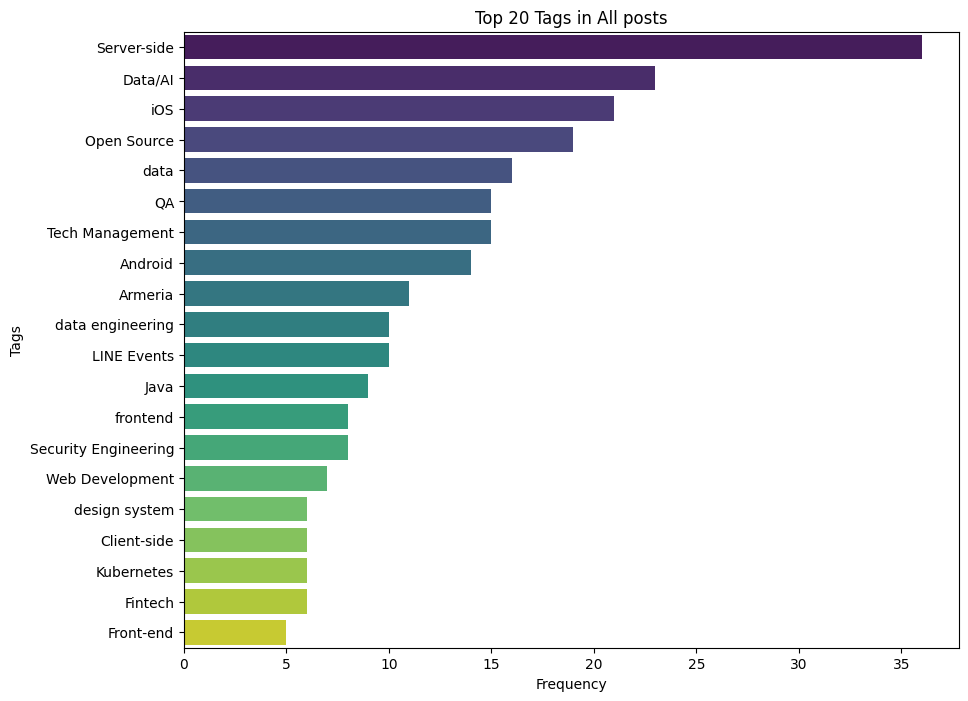

In [13]:
# x축 : 빈도수, y축 : 태그명
plt.figure(figsize=(10, 8))
sns.barplot(x='Count', y='Tag', data=tags_df, palette='viridis')
plt.title('Top 20 Tags in All posts')
plt.xlabel('Frequency')
plt.ylabel('Tags')
plt.show()

C:\Users\romk\AppData\Local\Temp\ipykernel_43344\3188933047.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tag', y='Count', data=tags_df, palette='viridis')


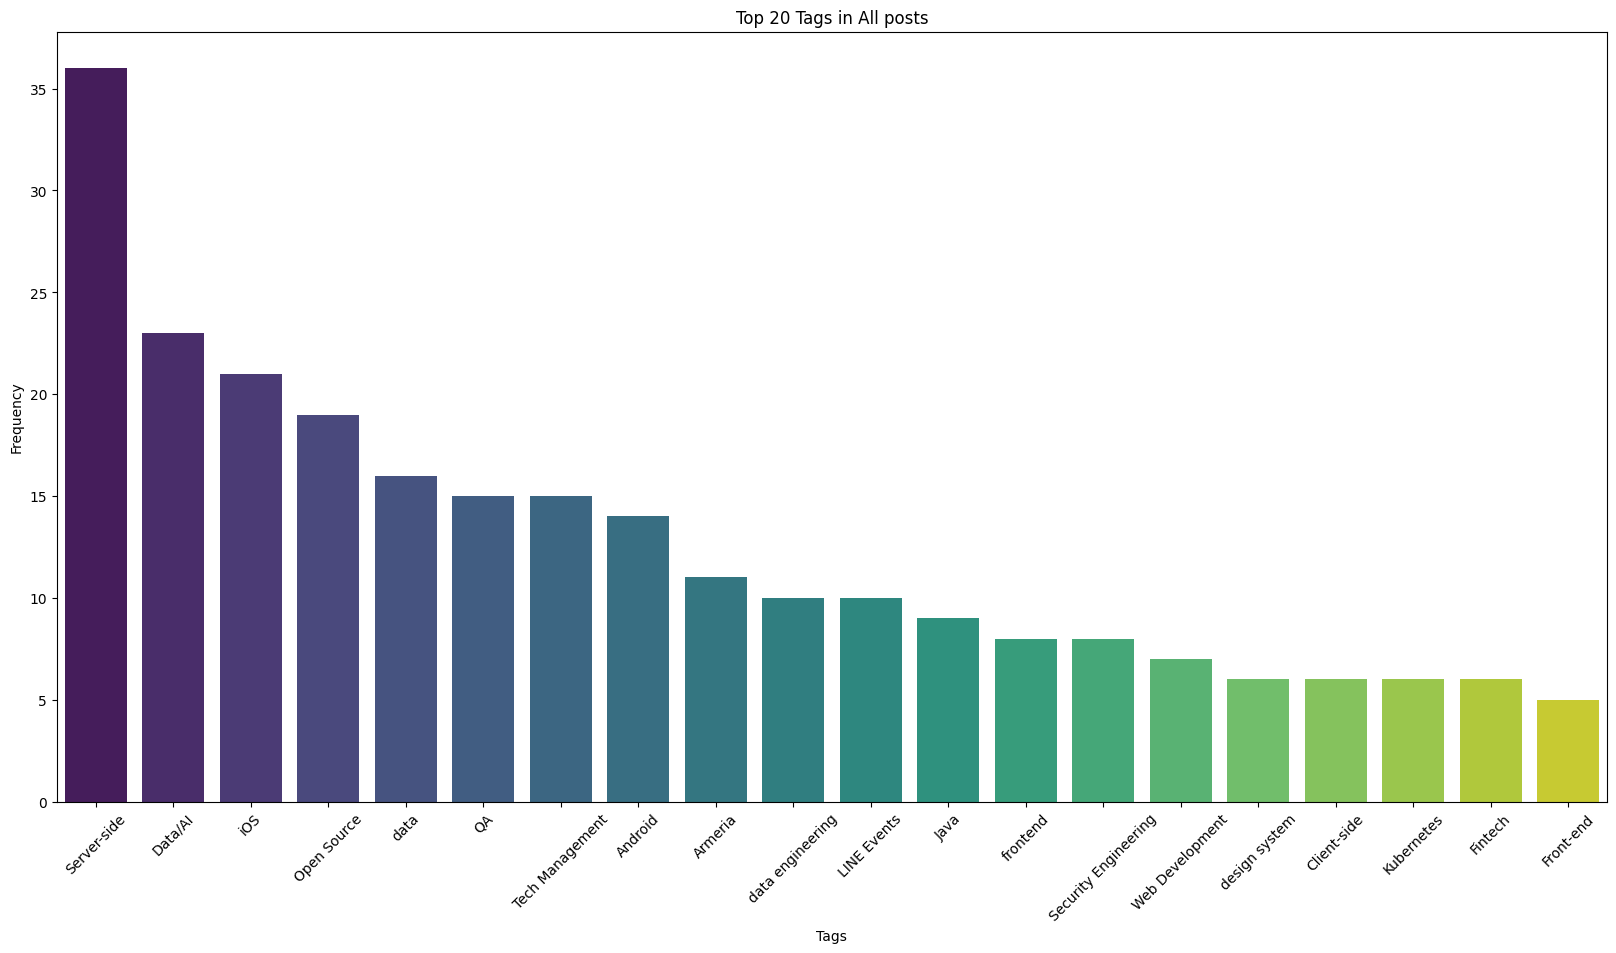

In [14]:
# x축 : 빈도수, y축 : 태그명
plt.figure(figsize=(20, 10))
sns.barplot(x='Tag', y='Count', data=tags_df, palette='viridis')
plt.title('Top 20 Tags in All posts')
plt.xticks(rotation=45)
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.show()

### 기업별 - barchart

In [15]:
company_tags_list = new_dummy_df[new_dummy_df['company'] == '쏘카']['tags'].dropna().str.split(', ').tolist()
company_tags_list = sum(company_tags_list, [])
company_tag_counts = Counter(company_tags_list)
company_tags_df = pd.DataFrame(company_tag_counts.most_common(20), columns=['Tag', 'Count'])

C:\Users\romk\AppData\Local\Temp\ipykernel_43344\2596510291.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Tag', data=company_tags_df, palette='viridis')


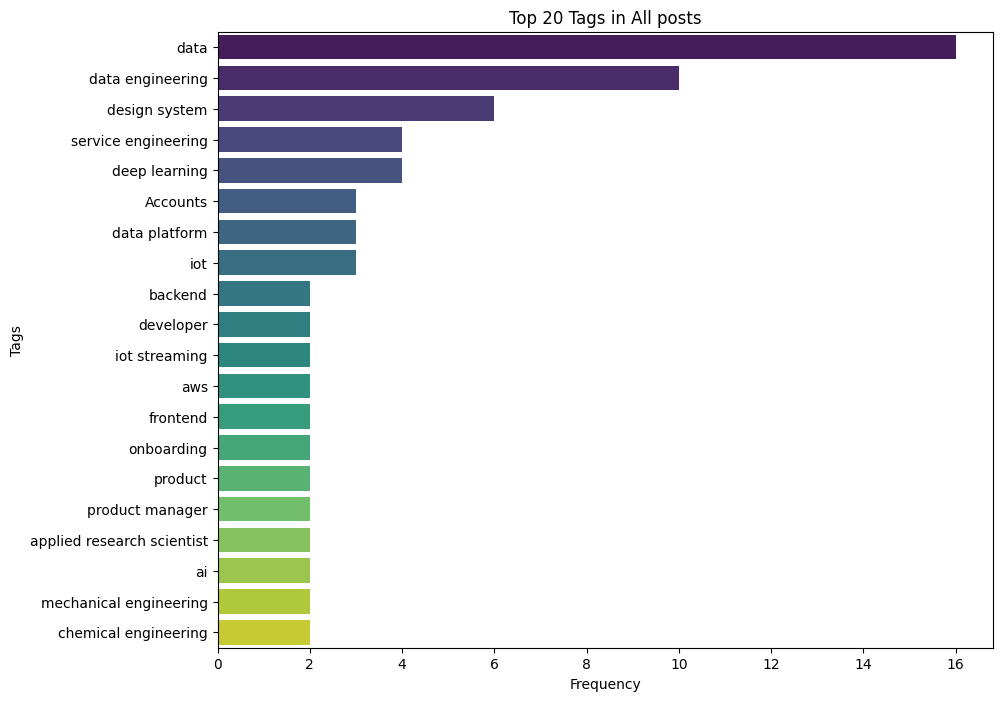

In [16]:
# x축 : 빈도수, y축 : 태그명
plt.figure(figsize=(10, 8))
sns.barplot(x='Count', y='Tag', data=company_tags_df, palette='viridis')
plt.title('Top 20 Tags in All posts')
plt.xlabel('Frequency')
plt.ylabel('Tags')
plt.show()

C:\Users\romk\AppData\Local\Temp\ipykernel_43344\1066039596.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tag', y='Count', data=company_tags_df, palette='viridis')


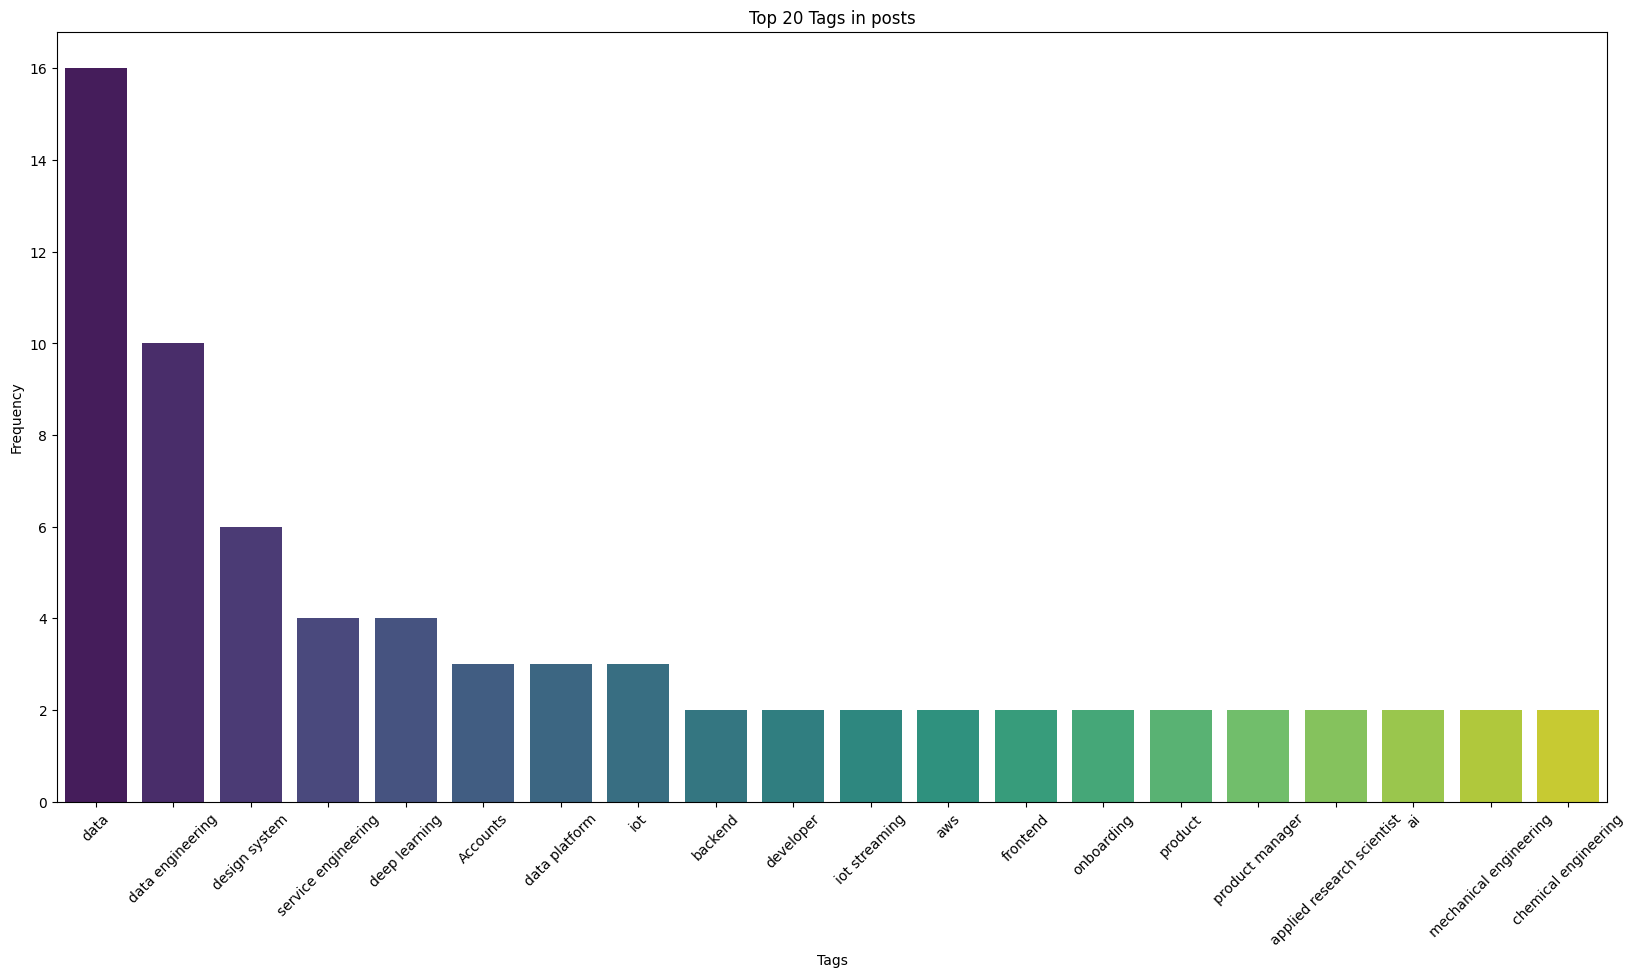

In [17]:
# x축 : 빈도수, y축 : 태그명
plt.figure(figsize=(20, 10))
sns.barplot(x='Tag', y='Count', data=company_tags_df, palette='viridis')
plt.title('Top 20 Tags in posts')
plt.xticks(rotation=45)
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.show()

### 전체 기업 - piechart(태그별 보다는 태그를 카테고리화 해서 시각화하는 것이 좋을 것 같음)

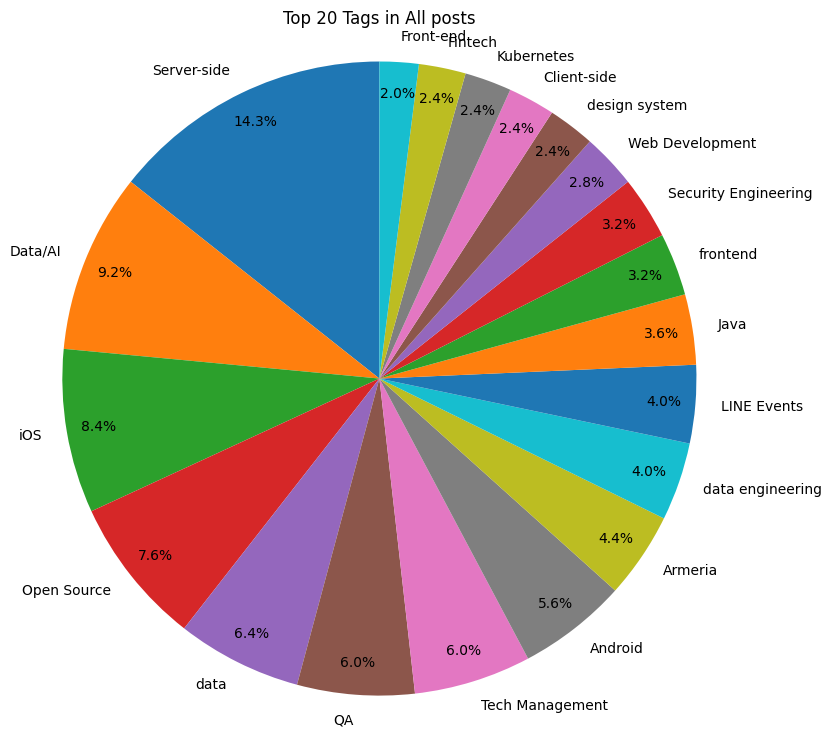

In [34]:
tags_list = new_dummy_df['tags'].dropna().str.split(', ').tolist()
tags_list = sum(tags_list, [])
tag_counts = Counter(tags_list)
top_tags = tag_counts.most_common(20)

fig, ax = plt.subplots(figsize=(9, 9))
ax.pie([count for tag, count in top_tags], labels=[tag for tag, count in top_tags], autopct='%1.1f%%', startangle=90, pctdistance=0.9, labeldistance=1.08)
# 원형 유지
ax.axis('equal')

plt.title('Top 20 Tags in All posts')
plt.show()

### 기업별 - piechart(태그별 보다는 태그를 카테고리화 해서 시각화하는 것이 좋을 것 같음)

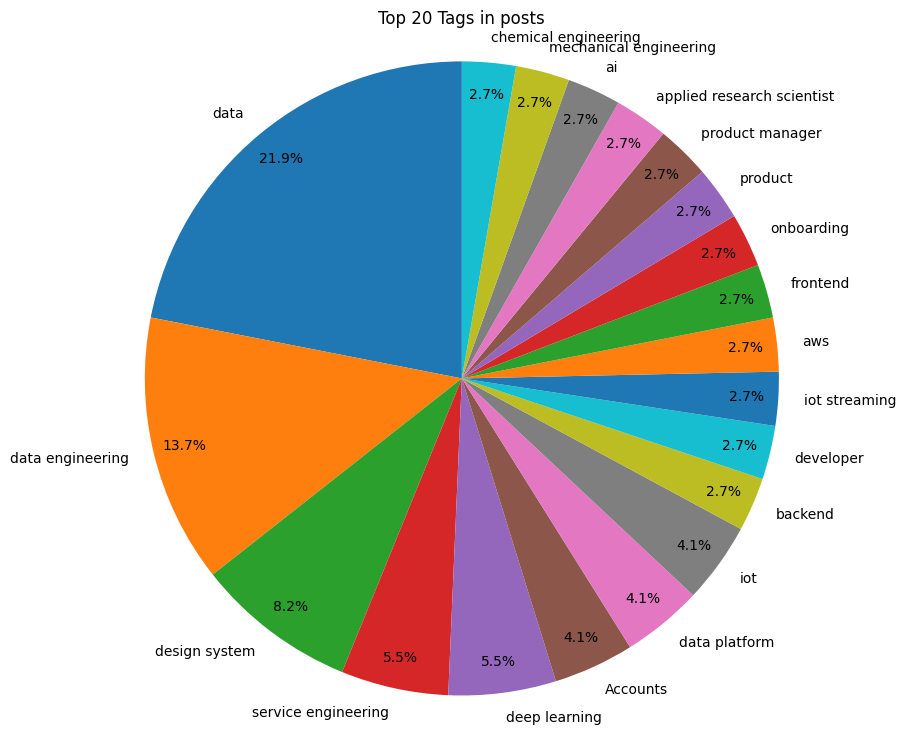

In [36]:
company_tags_list = new_dummy_df[new_dummy_df['company'] == '쏘카']['tags'].dropna().str.split(', ').tolist()
company_tags_list = sum(company_tags_list, [])
company_tag_counts = Counter(company_tags_list)
company_top_tags = company_tag_counts.most_common(20)

fig, ax = plt.subplots(figsize=(9, 9))
ax.pie([count for tag, count in company_top_tags], labels=[tag for tag, count in company_top_tags], autopct='%1.1f%%', startangle=90, pctdistance=0.9, labeldistance=1.08)
# 원형 유지
ax.axis('equal')

plt.title('Top 20 Tags in posts')
plt.show()

### 전체 기업 - 워드클라우드

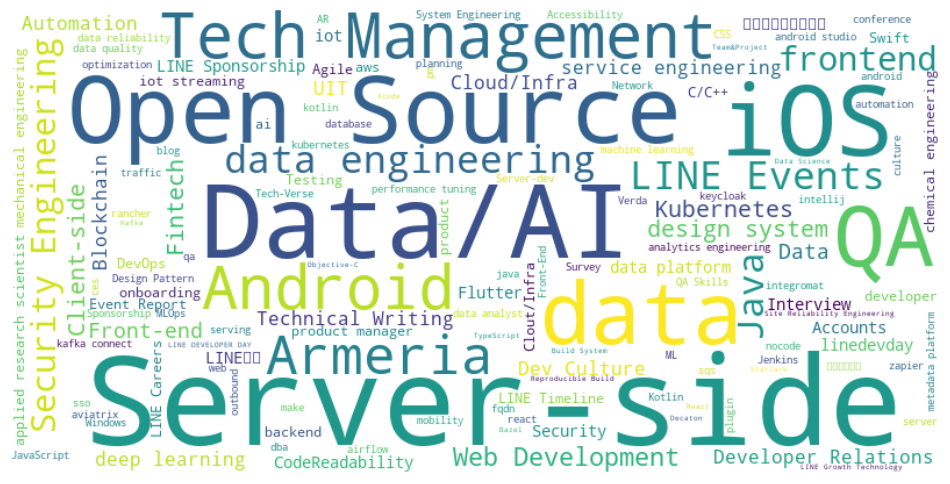

In [37]:
tags_list = new_dummy_df['tags'].dropna().str.split(', ').tolist()
tags_list = sum(tags_list, [])
tag_counts = Counter(tags_list)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tag_counts)

# 워드클라우드를 시각화합니다.
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축을 표시하지 않습니다.
plt.show()

### 기업별 - 워드클라우드

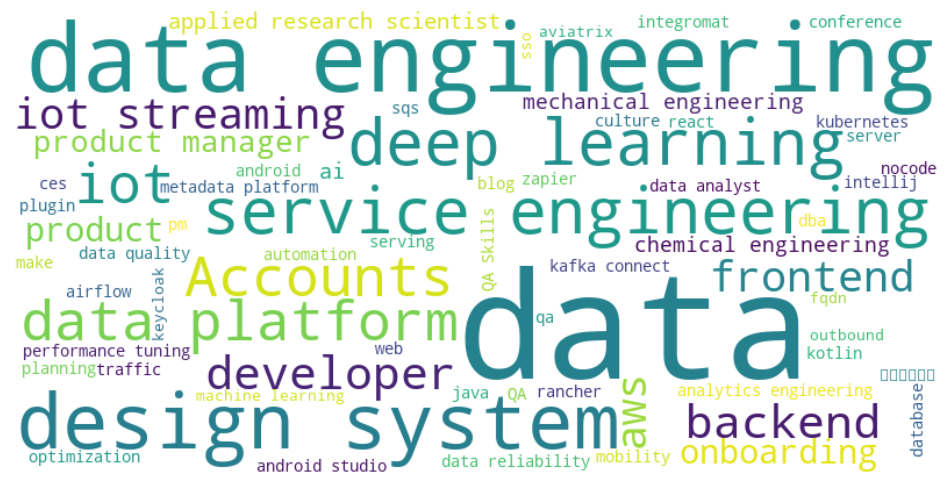

In [38]:
company_tags_list = new_dummy_df[new_dummy_df['company'] == '쏘카']['tags'].dropna().str.split(', ').tolist()
company_tags_list = sum(company_tags_list, [])
company_tag_counts = Counter(company_tags_list)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(company_tag_counts)

# 워드클라우드를 시각화합니다.
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축을 표시하지 않습니다.
plt.show()

## 시간에 따른 작성글 추이 시각화

### 전체 기업 - linechart

In [96]:
date_dummy_df = dummy_df[['date', 'company']]
# date 컬럼 datetime type로 변경
date_dummy_df['date'] = pd.to_datetime(date_dummy_df['date'])

C:\Users\romk\AppData\Local\Temp\ipykernel_21016\849366990.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_dummy_df['date'] = pd.to_datetime(date_dummy_df['date'])


In [97]:
date_dummy_df.head()

,date,company
0,2023-07-22,쏘카
1,2023-07-07,쏘카
2,2023-06-27,쏘카
3,2023-05-15,쏘카
4,2023-02-15,쏘카


In [98]:
# year_month 컬럼 추가 - yyyy-mm
date_dummy_df['year_month'] = date_dummy_df['date'].dt.strftime('%Y-%m')

C:\Users\romk\AppData\Local\Temp\ipykernel_21016\4286427808.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_dummy_df['year_month'] = date_dummy_df['date'].dt.strftime('%Y-%m')


In [99]:
date_dummy_df.head()

,date,company,year_month
0,2023-07-22,쏘카,2023-07
1,2023-07-07,쏘카,2023-07
2,2023-06-27,쏘카,2023-06
3,2023-05-15,쏘카,2023-05
4,2023-02-15,쏘카,2023-02


In [100]:
grouped_df = date_dummy_df.groupby(['company', 'year_month']).size().reset_index(name='posts_count')

In [101]:
grouped_df.head()

,company,year_month,posts_count
0,라인,2020-01,6
1,라인,2020-02,7
2,라인,2020-03,5
3,라인,2020-04,6
4,라인,2020-05,5


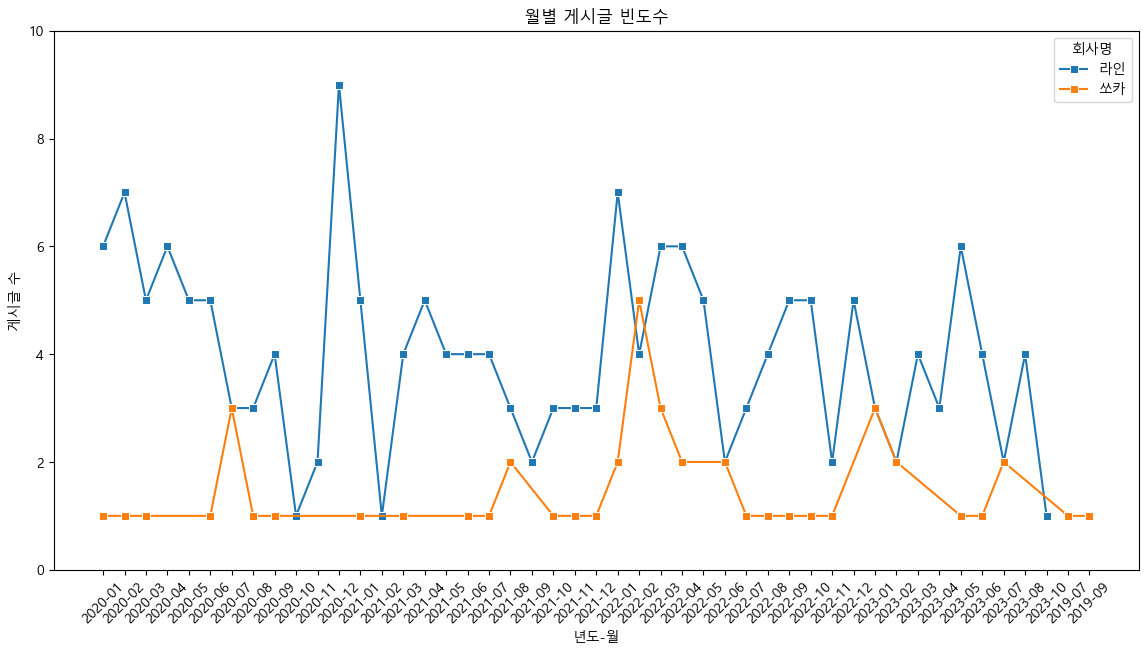

In [102]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=grouped_df, x='year_month', y='posts_count', hue='company', marker='s')

# 한글 깨짐 현상 해결
plt.rcParams['font.family'] = 'Malgun Gothic'  # 'Malgun Gothic' 대신 시스템에 설치된 한글 폰트명을 입력
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 문제 해결을 위해 설정

plt.ylim(0, grouped_df['posts_count'].max() + 1)
plt.xticks(rotation=45)
plt.title('월별 게시글 빈도수')
plt.xlabel('년도-월')
plt.ylabel('게시글 수')
plt.legend(title='회사명')
plt.show()

### 기업별 - linechart

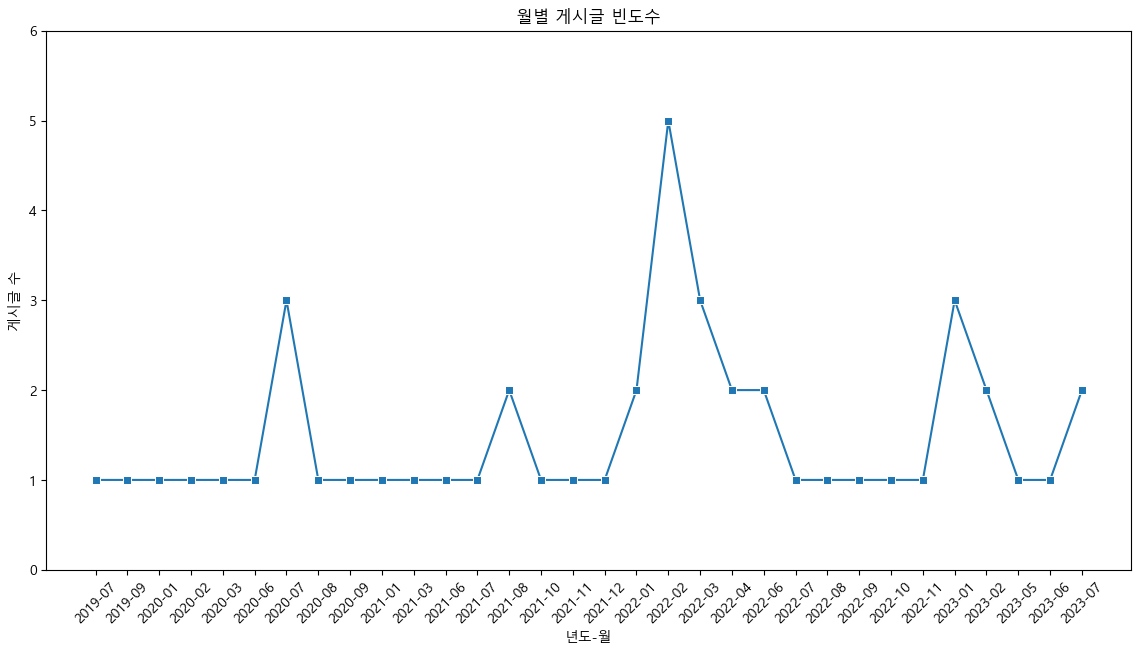

In [95]:
company_date_df = dummy_df[dummy_df['company'] == '쏘카'][['date', 'company']]
company_date_df['date'] = pd.to_datetime(company_date_df['date'])
company_date_df['year_month'] = company_date_df['date'].dt.strftime('%Y-%m')
company_grouped_df = company_date_df.groupby(['year_month']).size().reset_index(name='posts_count')

plt.figure(figsize=(14, 7))
sns.lineplot(data=company_grouped_df, x='year_month', y='posts_count', marker='s')

# 한글 깨짐 현상 해결
plt.rcParams['font.family'] = 'Malgun Gothic'  # 'Malgun Gothic' 대신 시스템에 설치된 한글 폰트명을 입력
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 문제 해결을 위해 설정

plt.ylim(0, company_grouped_df['posts_count'].max() + 1)
plt.xticks(rotation=45)
plt.title('월별 게시글 빈도수')
plt.xlabel('년도-월')
plt.ylabel('게시글 수')
plt.show()

## 이미지 저장

In [ ]:
save_path = '저장위치 + 파일명.png'
fig.savefig(save_path)